Assignment 2 : Implementing Feedforward neural networks with Keras and TensorFlow
a. Import the necessary packages
b. Load the training and testing data (MNIST/CIFAR10)
c. Define the network architecture using Keras
d. Train the model using SGD
e. Evaluate the network
f. Plot the training loss and accuracy

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
import matplotlib.pyplot as plt

In [2]:
# MNIST dataset   Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Data Loading
x_train, x_test = x_train/255.0, x_test/255.0  # Normalizing the data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


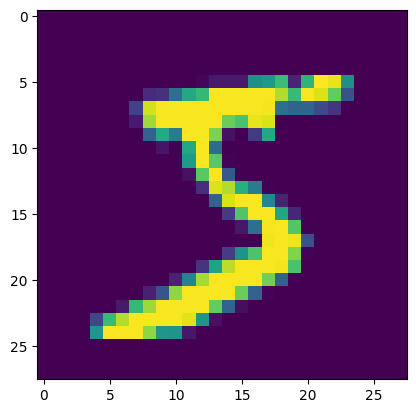

In [3]:
# Plotting an example
plt.imshow(x_train[0])
plt.show()

In [4]:
# Preparing the model
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(120, activation="relu"),
    Dropout(0.2),
    Dense(10)
])

In [5]:
# Making predictions
predictions = model(x_train[:1]).numpy()
print(predictions)

[[ 0.66929495  0.02894205  0.02285103  0.32016975  0.466477    0.02899387
  -0.43467     0.63364786  0.04093692  0.577344  ]]


In [6]:
# Applying softmax
print(tf.nn.softmax(predictions).numpy())

[[0.14615548 0.07703948 0.07657166 0.10308417 0.11932526 0.07704348
  0.04845842 0.14103723 0.07796913 0.1333157 ]]


In [7]:
# Loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [8]:
# Compiling the model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
# Training the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8620 - loss: 0.4854
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9521 - loss: 0.1599
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9656 - loss: 0.1108
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9714 - loss: 0.0912
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9769 - loss: 0.0750


In [10]:
# Evaluating the model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9766 - loss: 0.0726


[0.07262303680181503, 0.9765999913215637]

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9811 - loss: 0.0601 - val_accuracy: 0.9788 - val_loss: 0.0676
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9857 - loss: 0.0483 - val_accuracy: 0.9791 - val_loss: 0.0647
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9859 - loss: 0.0477 - val_accuracy: 0.9796 - val_loss: 0.0644
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9864 - loss: 0.0464 - val_accuracy: 0.9796 - val_loss: 0.0637
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9872 - loss: 0.0427 - val_accuracy: 0.9805 - val_loss: 0.0633


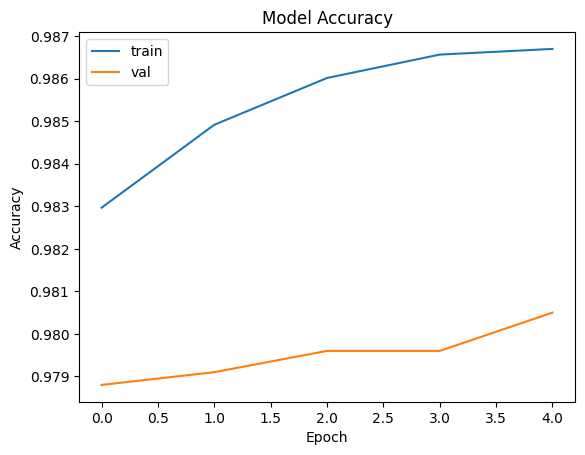

In [11]:
# Validation of Model
val = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=300)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train", "val"])
plt.show()